In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_style("whitegrid")

# Data Upload

In [46]:
df_trx = pd.read_excel("desafiocripto_transacciones.xlsx", engine="openpyxl", sheet_name="transacciones_clean")

In [47]:
df_trx["fecha_trx"] = df_trx["CRIPTO_TRX_CREATED_DTTM_4GMT"].dt.date

# Costo de oportunidad perdido en primera ronda

In [ ]:
#df_trx2 = df_trx.sample(10, random_state=788)
df_trx["nro_de_trx_usr"] = np.zeros(len(df_trx))


for i, row in df_trx.iterrows():
    cust_id = row["cust_id"]
    nro_trx = df_trx[(df_trx["cust_id"] == cust_id)&(df_trx.index<=i)]["cust_id"].count()
    df_trx.loc[i, "nro_de_trx_usr"] = nro_trx
    
    
df_trx

In [74]:
usuarios_con_error_en_1 = df_trx[(df_trx["nro_de_trx_usr"] == 1)&(df_trx["CRIPTO_TRX_STATUS"]=="CANCELLED")]["cust_id"].unique()
usuarios_sin_error_en_1 = df_trx[(df_trx["nro_de_trx_usr"] == 1)&(df_trx["CRIPTO_TRX_STATUS"]=="COMPLETED")]["cust_id"].unique()

usuarios_con_error_volvieron = df_trx[(df_trx["nro_de_trx_usr"] == 2)&(df_trx["cust_id"].isin(usuarios_con_error_en_1))]["cust_id"].unique()
usuarios_sin_error_volvieron = df_trx[(df_trx["nro_de_trx_usr"] == 2)&(df_trx["cust_id"].isin(usuarios_sin_error_en_1))]["cust_id"].unique()



print(len(usuarios_con_error_en_1))
print(len(usuarios_sin_error_en_1))
print(len(df_trx["cust_id"].unique()))
print(len(usuarios_con_error_volvieron))
print(len(usuarios_sin_error_volvieron))


28498
32712
61210
11527
3604


In [81]:
usuarios_con_error_no_volvieron = np.setdiff1d(usuarios_con_error_en_1, usuarios_con_error_volvieron)

costo_op_perdido = df_trx[(df_trx["cust_id"].isin(usuarios_con_error_no_volvieron))]["CRIPTO_TRX_FEE_AMOUNT"].sum()
total_ventas = df_trx[df_trx["CRIPTO_TRX_STATUS"]=="COMPLETED"]["CRIPTO_TRX_FEE_AMOUNT"].sum()


print(costo_op_perdido)
print(total_ventas)
costo_op_perdido / total_ventas

17133.38
34027.06


0.5035221967457665

# Histograma de intentos

In [96]:
df_intentos = df_trx[df_trx["cust_id"].isin(usuarios_con_error_en_1)].groupby("cust_id")["nro_de_trx_usr"].max().to_frame("intentos").reset_index()
df_intentos = df_intentos["intentos"].astype("int")
#df_intentos["intentos"].value_counts()
df_intentos#.to_clipboard()
#sns.barplot(data=df_intentos, x="intentos")

0        8
1        1
2        2
3        1
4        1
        ..
28493    2
28494    3
28495    1
28496    2
28497    1
Name: intentos, Length: 28498, dtype: int32

# Scatter Plot de transacciones por usuario por dia

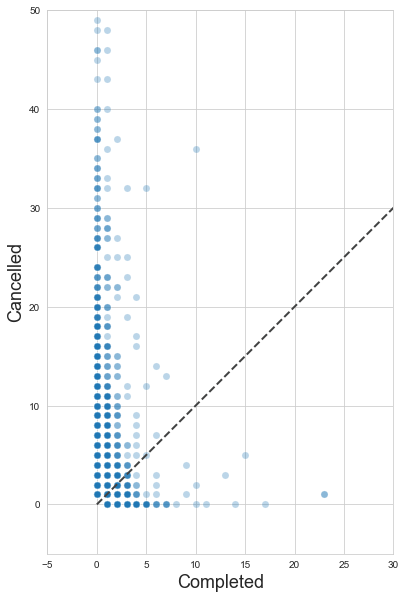

In [129]:
df1 = df_trx.groupby(["cust_id", "fecha_trx", "CRIPTO_TRX_STATUS"])["trx_id"].count().to_frame("cuenta").reset_index()
df2 = pd.pivot_table(df1, values="cuenta", index=["cust_id", "fecha_trx"], columns="CRIPTO_TRX_STATUS", aggfunc=sum).fillna(0)

fig, ax = plt.subplots(1,1, figsize=(10,10))

scatter1 = sns.scatterplot(data=df2, x="COMPLETED", y="CANCELLED", alpha=0.3, s=50)
plt.plot([0,50],[0,50], lw=2, color='#414242', linestyle='dashed')


#scatter1.set_yticklabels(scatter1.get_yticks(), size = 15)
#scatter1.set_xticklabels(scatter1.get_xticks(), size = 15)
scatter1.set(xlim=(-5,30))
scatter1.set(ylim=(-5,50))
scatter1.set(aspect="equal")
scatter1.set_ylabel('Cancelled',size=18)
scatter1.set_xlabel('Completed',size=18)

fig.savefig("Scatter_trx.png", dpi=300)

In [97]:
df_trx[df_trx["nro_de_trx_usr"]==1]["cripto_acc_status_id"].value_counts()

investing    60912
disabled       201
pending          2
Name: cripto_acc_status_id, dtype: int64

[(0.0, 50.0)]

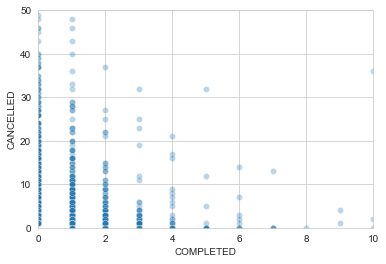

# Correlation Analysis

Determinante de la matriz de correlaciones:
0.0


<AxesSubplot:>

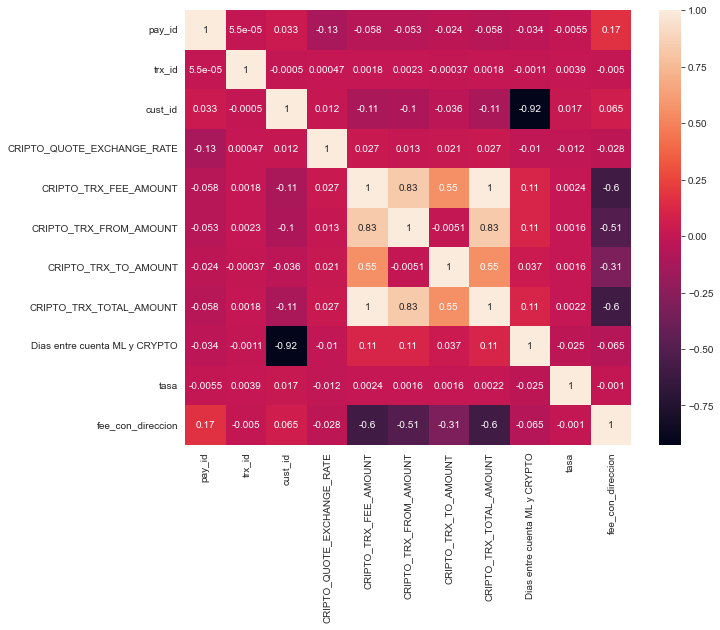

In [40]:
corr = df_trx.corr()

print("Determinante de la matriz de correlaciones:")
print(round(np.linalg.det(corr),2))
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True)